# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bodem\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# # Read your api key environment variable
# api_key = os.getenv('news_api')
# type(api_key)

In [3]:
# Create a newsapi client cbaa561e52594056aec4dbc568925985
newsapi = NewsApiClient(api_key='cbaa561e52594056aec4dbc568925985')

In [4]:
# Fetch the Bitcoin news articles
bit_news = newsapi.get_everything(q="bitcoin", language="en")
print(f"Total articles about bitcoin: {bit_news['totalResults']}")
bit_df = pd.DataFrame.from_dict(bit_news["articles"])
bit_df.head(5)

Total articles about bitcoin: 8256


,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,A fake press release claiming Kroger accepts c...,A crypto hoax claimed Kroger is accepting Bitc...,https://www.theverge.com/2021/11/5/22765098/kr...,https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--m...,2021-11-05T13:32:14Z,A similar hoax earlier this year tied Walmart ...
1,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),"Who Bought $1.6B in Bitcoin Wednesday, and Why?",last week the cryptocurrency market persistent...,https://techncruncher.blogspot.com/2021/10/who...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-10T20:12:00Z,"Specifically, why did someone make a massive p..."
2,"{'id': None, 'name': 'Gizmodo.com'}",Molly Taft,Bitcoin Miners Are Gobbling Up U.S. Energy,There’s a big new presence slurping up power f...,https://gizmodo.com/bitcoin-miners-are-gobblin...,https://i.kinja-img.com/gawker-media/image/upl...,2021-10-28T16:45:00Z,Theres a big new presence slurping up power fr...
3,"{'id': None, 'name': 'Gizmodo.com'}",Molly Taft,Mining Bitcoin Using Nuclear Power May Be Fine...,"Last week, the Wall Street Journal ran a piece...",https://gizmodo.com/mining-bitcoin-using-nucle...,https://i.kinja-img.com/gawker-media/image/upl...,2021-10-08T16:35:00Z,"Last week, the Wall Street Journal ran a piece..."
4,"{'id': None, 'name': 'Gizmodo.com'}",Tom McKay,Roughly One-Third of Bitcoin Is Controlled by ...,"For all the talk of democratizing finance, the...",https://gizmodo.com/roughly-one-third-of-bitco...,https://i.kinja-img.com/gawker-media/image/upl...,2021-10-26T18:10:00Z,"For all the talk of democratizing finance, the..."


In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="Ethereum", language="en")
print(f"Total articles about ethereum: {eth_news['totalResults']}")
eth_df = pd.DataFrame.from_dict(eth_news["articles"])
eth_df.head(5)

Total articles about ethereum: 2837


,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Nervos launches cross-chain bridge to connect ...,A new cross-chain bridge is currently connecte...,https://techncruncher.blogspot.com/2021/10/ner...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...
1,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Mark Cuban Heralds Ethereum, Bitcoin",Mark Cuban has some advice for people who are ...,https://www.entrepreneur.com/article/391242,https://assets.entrepreneur.com/content/3x2/20...,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...
2,"{'id': 'business-insider', 'name': 'Business I...",hrobertson@businessinsider.com (Harry Robertson),JPMorgan says ethereum is a better bet than bi...,Ethereum is the more resilient cryptocurrency ...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-05T12:06:22Z,Ethereum and bitcoin are the two biggest crypt...
3,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),A meme coin named after Elon Musk rode the wav...,The surge in October pushed the ethereum-based...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-01T16:35:14Z,Elon Musk\r\npicture alliance / Getty Images\r...
4,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),Obscure altcoin mana spikes 400% as Facebook's...,"The price of Decentraland, whose ticker is man...",https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-01T15:34:40Z,Cryptocurrency and business continuity line im...


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bit_sentiments = []

for article in bit_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bit_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
#sort by recency   
bit_sent_df = pd.DataFrame(bit_sentiments)
bit_sent_df.head()

,text,date,compound,positive,negative,neutral
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937
1,"Specifically, why did someone make a massive p...",2021-10-10,0.5461,0.121,0.000,0.879
2,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904
3,"Last week, the Wall Street Journal ran a piece...",2021-10-08,0.3400,0.099,0.000,0.901
4,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

#sort by recency
eth_sent_df = pd.DataFrame(eth_sentiments)
eth_sent_df.head()

,text,date,compound,positive,negative,neutral
0,A new cross-chain bridge is currently connecte...,2021-10-16,0.0000,0.000,0.0,1.000
1,Mark Cuban has some advice for people who are ...,2021-10-14,0.0000,0.000,0.0,1.000
2,Ethereum and bitcoin are the two biggest crypt...,2021-11-05,0.4588,0.094,0.0,0.906
3,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01,0.5267,0.093,0.0,0.907
4,Cryptocurrency and business continuity line im...,2021-11-01,0.4588,0.097,0.0,0.903


In [36]:
# Describe the Bitcoin Sentiment

bit_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.228530,0.059250,0.003150,0.937600
std,0.284345,0.065847,0.014087,0.064354
min,-0.273200,0.000000,0.000000,0.801000
25%,0.000000,0.000000,0.000000,0.893750
50%,0.148000,0.032000,0.000000,0.936500
75%,0.485175,0.106250,0.000000,1.000000
max,0.755800,0.199000,0.063000,1.000000


In [37]:
# Describe the Ethereum Sentiment
eth_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.224430,0.047950,0.002400,0.949650
std,0.295698,0.066084,0.010733,0.070553
min,0.000000,0.000000,0.000000,0.792000
25%,0.000000,0.000000,0.000000,0.905250
50%,0.000000,0.000000,0.000000,1.000000
75%,0.475775,0.094750,0.000000,1.000000
max,0.822500,0.208000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [38]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.tokenize import RegexpTokenizer

In [39]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()



#Create a list of stopwords
stopwords = nltk.corpus.stopwords.words('english')


# Expand the default stopwords list if necessary
#stopwords.append('newWord')

In [40]:
# first content for bitcoin and ethereum in news articles
bit_page = bit_news['articles'][0]['content']
eth_page = eth_news['articles'][0]['content']

In [41]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

   
    # Create a tokenized list of the words
    token_words = word_tokenize(re_clean)
    
  

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in token_words]

   
    # Convert the words to lowercase
    lower = [word.lower() for word in lem]
    # Remove the stop words
    stw = nltk.corpus.stopwords.words('english')
    tokens = [word for word in lower if word not in stw]
    
    
    return tokens

In [42]:
# Create a new tokens column for Bitcoin
btc_token =tokenizer(bit_page)
btc_token

['similar',
 'hoax',
 'earlier',
 'year',
 'tied',
 'walmart',
 'litecoinif',
 'buy',
 'something',
 'verge',
 'link',
 'vox',
 'media',
 'may',
 'earn',
 'commission',
 'see',
 'ethic',
 'statementphoto',
 'illustration',
 'thiago',
 'prudencios',
 'char']

In [43]:
# Create a new tokens column for Ethereum
eth_token = tokenizer(eth_page)
eth_token

['new',
 'crosschain',
 'bridge',
 'currently',
 'connected',
 'ethereum',
 'crosschain',
 'bridge',
 'cardano',
 'public',
 'chain',
 'come',
 'futurenervostoday',
 'announced',
 'force',
 'bridge',
 'char']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [44]:
from collections import Counter
from nltk import ngrams

In [45]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = Counter(ngrams(btc_token, n=2))
btc_ngram

Counter({('similar', 'hoax'): 1,
         ('hoax', 'earlier'): 1,
         ('earlier', 'year'): 1,
         ('year', 'tied'): 1,
         ('tied', 'walmart'): 1,
         ('walmart', 'litecoinif'): 1,
         ('litecoinif', 'buy'): 1,
         ('buy', 'something'): 1,
         ('something', 'verge'): 1,
         ('verge', 'link'): 1,
         ('link', 'vox'): 1,
         ('vox', 'media'): 1,
         ('media', 'may'): 1,
         ('may', 'earn'): 1,
         ('earn', 'commission'): 1,
         ('commission', 'see'): 1,
         ('see', 'ethic'): 1,
         ('ethic', 'statementphoto'): 1,
         ('statementphoto', 'illustration'): 1,
         ('illustration', 'thiago'): 1,
         ('thiago', 'prudencios'): 1,
         ('prudencios', 'char'): 1})

In [46]:
# Generate the Ethereum N-grams where N=2
etc_ngram = Counter(ngrams(eth_token, n=2))
etc_ngram

Counter({('new', 'crosschain'): 1,
         ('crosschain', 'bridge'): 2,
         ('bridge', 'currently'): 1,
         ('currently', 'connected'): 1,
         ('connected', 'ethereum'): 1,
         ('ethereum', 'crosschain'): 1,
         ('bridge', 'cardano'): 1,
         ('cardano', 'public'): 1,
         ('public', 'chain'): 1,
         ('chain', 'come'): 1,
         ('come', 'futurenervostoday'): 1,
         ('futurenervostoday', 'announced'): 1,
         ('announced', 'force'): 1,
         ('force', 'bridge'): 1,
         ('bridge', 'char'): 1})

In [47]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [48]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_token, N =10)

[('similar', 1),
 ('hoax', 1),
 ('earlier', 1),
 ('year', 1),
 ('tied', 1),
 ('walmart', 1),
 ('litecoinif', 1),
 ('buy', 1),
 ('something', 1),
 ('verge', 1)]

In [49]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_token, N =10)

[('bridge', 3),
 ('crosschain', 2),
 ('new', 1),
 ('currently', 1),
 ('connected', 1),
 ('ethereum', 1),
 ('cardano', 1),
 ('public', 1),
 ('chain', 1),
 ('come', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

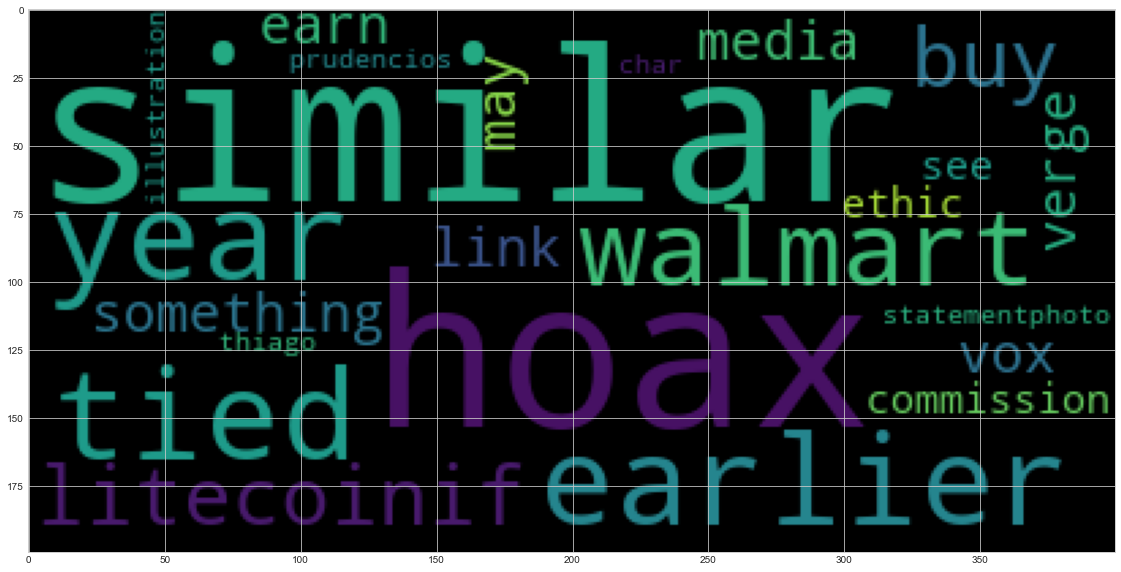

In [51]:
# Generate the Bitcoin word cloud

btc_string = ' '.join(btc_token)

wc = WordCloud().generate(btc_string)
plt.imshow(wc)

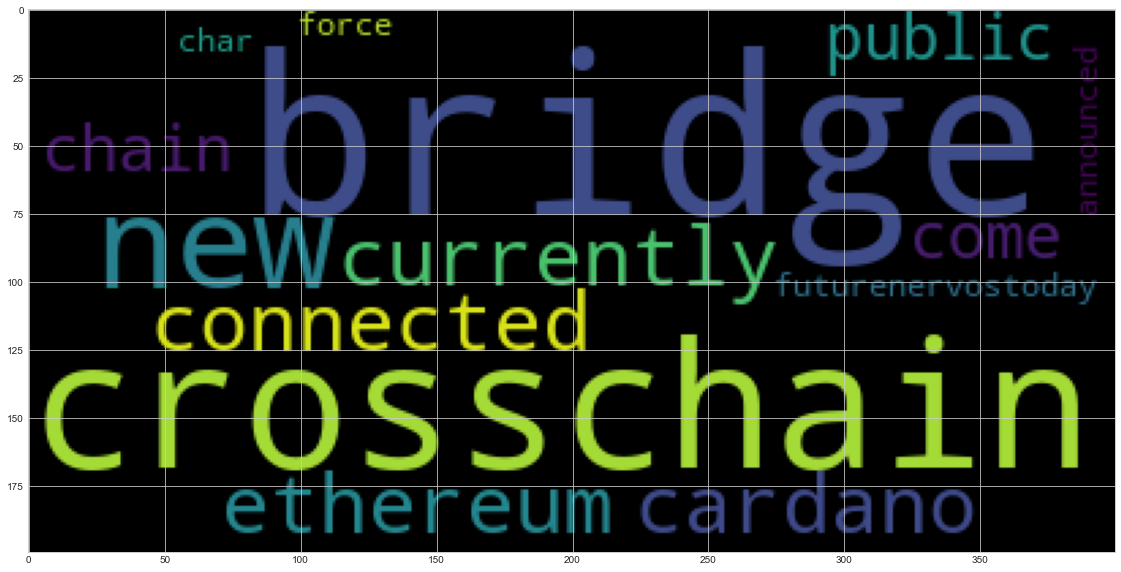

In [52]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth_token)

wc = WordCloud().generate(eth_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy

In [54]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-11-09 11:50:42.459343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-09 11:50:42.459405: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [55]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [56]:
# # Concatenate all of the Bitcoin text together
bit_doc = nlp(bit_page)
bit_doc

A similar hoax earlier this year tied Walmart to Litecoin
If you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.
Photo Illustration by Thiago Prudencio/S… [+1900 chars]

In [57]:
# Render the visualization
displacy.render(bit_doc, style='ent', page= True)

In [58]:
# List all Entities
for ent in bit_doc.ents:
    print(ent.text, ent.label_)

earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON


---

### Ethereum NER

In [59]:
# Concatenate all of the Ethereum text together
eth_doc = nlp(eth_page)
eth_doc

A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.
Nervos today announced that the Force Bridge is … [+3114 chars]

In [60]:
# Render the visualization
displacy.render(eth_doc, style='ent')


In [61]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC


---